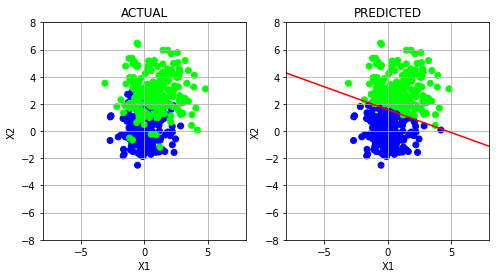

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from matplotlib.animation import FuncAnimation


def multivariatedata(mean1,mean2,cov1,cov2):
    """This function generates some multivariate data based on two underlying classes"""
    mean = [0, 0]
    cov = [[1, 0], [0, 1]] 
    x11, x21 = np.random.multivariate_normal(mean1, cov1, 200).T
    x12, x22 = np.random.multivariate_normal(mean2, cov2, 200).T
    features = np.column_stack((np.concatenate((x11,x12)), np.concatenate((x21,x22))))
    labels = np.array([np.floor(0.5*i/100) for i in range(400)])
    return features,labels
                                
mean1, mean2 = [0,0], [1,3]
cov1, cov2 =  [[1, 0], [0, 1]], [[2, 0], [0, 2]]

# Generate some initial data for the scatter plot                               
features, labels = multivariatedata(mean1,mean2,cov1,cov2)

#initializing the SVM model with linear kernel and some regularization
clf = svm.SVC(kernel = 'linear', C=1)
                                
# Define the animation function
def update(i):
    # Generate some new data for the scatter plot
    features, labels = multivariatedata(mean1,mean2,cov1,cov2) 
    clf.fit(features,labels)
    des_y = des_x*(-clf.coef_[0][0] / clf.coef_[0][1]) - clf.intercept_[0] / clf.coef_[0][1]
    
    # Update the scatter plot with the new data
    scat.set_offsets(features)
    scat1.set_offsets(features)
    scat1.set_array(clf.predict(features))
    line.set_data(des_x,des_y)
    
    # Return the scatter plot object
    return scat,line


# Create the scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

for ax in (ax1,ax2):
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.grid()
    
ax1.set_title('ACTUAL')
ax2.set_title("PREDICTED")

scat = ax1.scatter(features[:, 0], features[:, 1], c=labels, cmap='brg')

des_x = np.linspace(-100,100,10)
line, = ax2.plot([], [], c='r', label='Line 1')
scat1 = ax2.scatter(features[:, 0], features[:, 1], c=labels, cmap='brg')

# Create the animation
ani = FuncAnimation(fig, update, frames=10, blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())
